# [Machine Learning] Supervised Learning
# Logistic Regression
# $y = \frac{1}{1+e^{-(ax+b)}} $
- Sigmoid function: 0 => 1

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

## Logistic Regression

In [2]:
x = np.array([2,3,4,5,6,7,8,9,10]).reshape(9,1)
y = np.array([0,0,0,0,0,1,1,1,1])

In [3]:
lg = LogisticRegression()
lg.fit(x,y)
y_predict = lg.predict(x)
r_score = r2_score(y,y_predict)

In [4]:
y_predict

array([0, 0, 0, 0, 0, 1, 1, 1, 1])

R-Squared is:  1.0


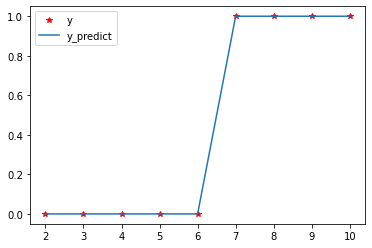

In [5]:
print('R-Squared is: ', r_score)
plt.plot(x,y,'r*', label='y');
plt.plot(x,y_predict, label='y_predict');
plt.legend();

# Training And Testing Split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.7, random_state=0)

In [7]:
x_train

array([[2],
       [7]])

In [8]:
x_test

array([[ 9],
       [ 4],
       [ 3],
       [ 6],
       [10],
       [ 8],
       [ 5]])

In [9]:
y_train

array([0, 1])

In [10]:
y_test

array([1, 0, 0, 0, 1, 1, 0])

In [11]:
lg.fit(x_train,y_train)
y_pre = lg.predict(x_train)

In [12]:
y_pre

array([0, 1])

In [13]:
r_squared = r2_score(y_train,y_pre)

R-Squared is:  1.0


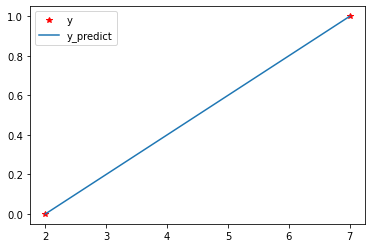

In [14]:
print('R-Squared is: ', r_squared)
plt.plot(x_train,y_train,'r*', label='y');
plt.plot(x_train,y_pre, label='y_predict');
plt.legend();

# Accuracy And Confusion Matrix

## Accuracy
- score(x,y)
- accuracy_score(x,$y_p$)

In [15]:
# accuracy by score
score = lg.score(x_test,y_test)
score

0.7142857142857143

In [16]:
# accuracy by accuracy_score
ac_score = accuracy_score(y_train, y_pre)
ac_score

1.0

## Confusion Matrix

In [17]:
cm =confusion_matrix(y_train, y_pre)
cm

array([[1, 0],
       [0, 1]])

### Accuracy
### $ACCURACY = \frac{TN+TP}{TN+TP+FN+FP}$

### False Positive Rate
### $FPR = \frac{FP}{FP+TN}$

### False Nagative Rate
### $FNR = \frac{FN}{FN+TP}$

### True Positive Rate
### $TPR = \frac{TP}{TP+FP}$

### True Nagative Rate
### $TNR = \frac{TN}{TN+FN}$

## Precision and Recall

### Precision
### $PRECISON = \frac{TP}{TP+FP}$

### Recall
### $RECALL = \frac{TP}{TP+FN}$

### Example

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.5, random_state=42)
lg.fit(x_train,y_train)
y_train_pre = lg.predict(x_train)

In [19]:
report = classification_report(y_train,y_train_pre)
precision = accuracy_score(y_train,y_train_pre)
conf = confusion_matrix(y_train, y_train_pre)

In [20]:
print('Precision is: ',precision)
print('Confusion Matrix: \n',conf)
print('y_train: ',y_train)
print('y_train_predict: ',y_train_pre)
print('Report table:\n',report)

Precision is:  1.0
Confusion Matrix: 
 [[3 0]
 [0 1]]
y_train:  [0 0 0 1]
y_train_predict:  [0 0 0 1]
Report table:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## F1-Score

### $F1-Score = 2\frac {precison.recall}{ precision+recall}$
- Perfect case F1_Score = 1

### $F_\beta = (1+\beta^2) \frac{precision.recall}{precision+recall}$	
- if choice precision then $\beta$  < 1 (normal 0.5)
- if choice recall then $\beta$  > 1 (normal 2)

## Predict Probability

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.5, random_state=42)
lg.fit(x_test,y_test)
y_test_pre = lg.predict(x_test)

In [22]:
report = classification_report(y_test,y_test_pre)
precision = accuracy_score(y_test,y_test_pre)
cm = confusion_matrix(y_test,y_test_pre)
predict_pro = lg.predict_proba(x_test)[:,1]

In [23]:
print('Precision is: ',precision)
print('Confusion Matrix: \n',cm)
print('y_test: ',y_test)
print('y_test_predict: ',y_test_pre)
print('Predict_Probability: \n', predict_pro)
print('Report table:\n',report)

Precision is:  1.0
Confusion Matrix: 
 [[2 0]
 [0 3]]
y_test:  [1 0 1 0 1]
y_test_predict:  [1 0 1 0 1]
Predict_Probability: 
 [0.97200154 0.13161457 0.85016374 0.05773522 0.98848894]
Report table:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [24]:
lg.predict_proba([[6]])[:,0]

array([0.30359752])

## Sensitivity and Specificity
### $Specificity = \frac{TN}{TN+FP}$
### $Sensitivity = Recall$

## ROC(Receiver Operating Characteristics) and AUC (Area Under the Curve)

In [25]:
fpr, tpr, _ =roc_curve(y_test,predict_pro)
auc = auc(fpr,tpr)

Text(0.5, 1.0, 'ROC')

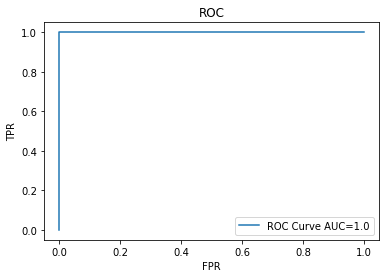

In [26]:
plt.plot(fpr, tpr, label='ROC Curve AUC=%.1f'%auc);
plt.legend();
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')